## What is the probability that a randomly simulated Connect 4 game (out of 100) lasts more than 20 moves?



📝 Game Log:
Move 1: Player 1 → Column 2
Move 2: Player 2 → Column 2
Move 3: Player 1 → Column 6
Move 4: Player 2 → Column 7
Move 5: Player 1 → Column 5
Move 6: Player 2 → Column 1
Move 7: Player 1 → Column 6
Move 8: Player 2 → Column 5
Move 9: Player 1 → Column 2
Move 10: Player 2 → Column 4
Move 11: Player 1 → Column 7
Move 12: Player 2 → Column 7
Move 13: Player 1 → Column 2
Move 14: Player 2 → Column 6
Move 15: Player 1 → Column 4
Move 16: Player 2 → Column 5
Move 17: Player 1 → Column 6
Move 18: Player 2 → Column 7

🎉 Player 2 wins after 18 moves!

📦 Final Board:
| . . . . . . . |
| . . . . . . . |
| . 1 . . . 1 2 |
| . 1 . . 2 2 2 |
| . 2 . 1 2 1 1 |
| 2 1 . 2 1 1 2 |


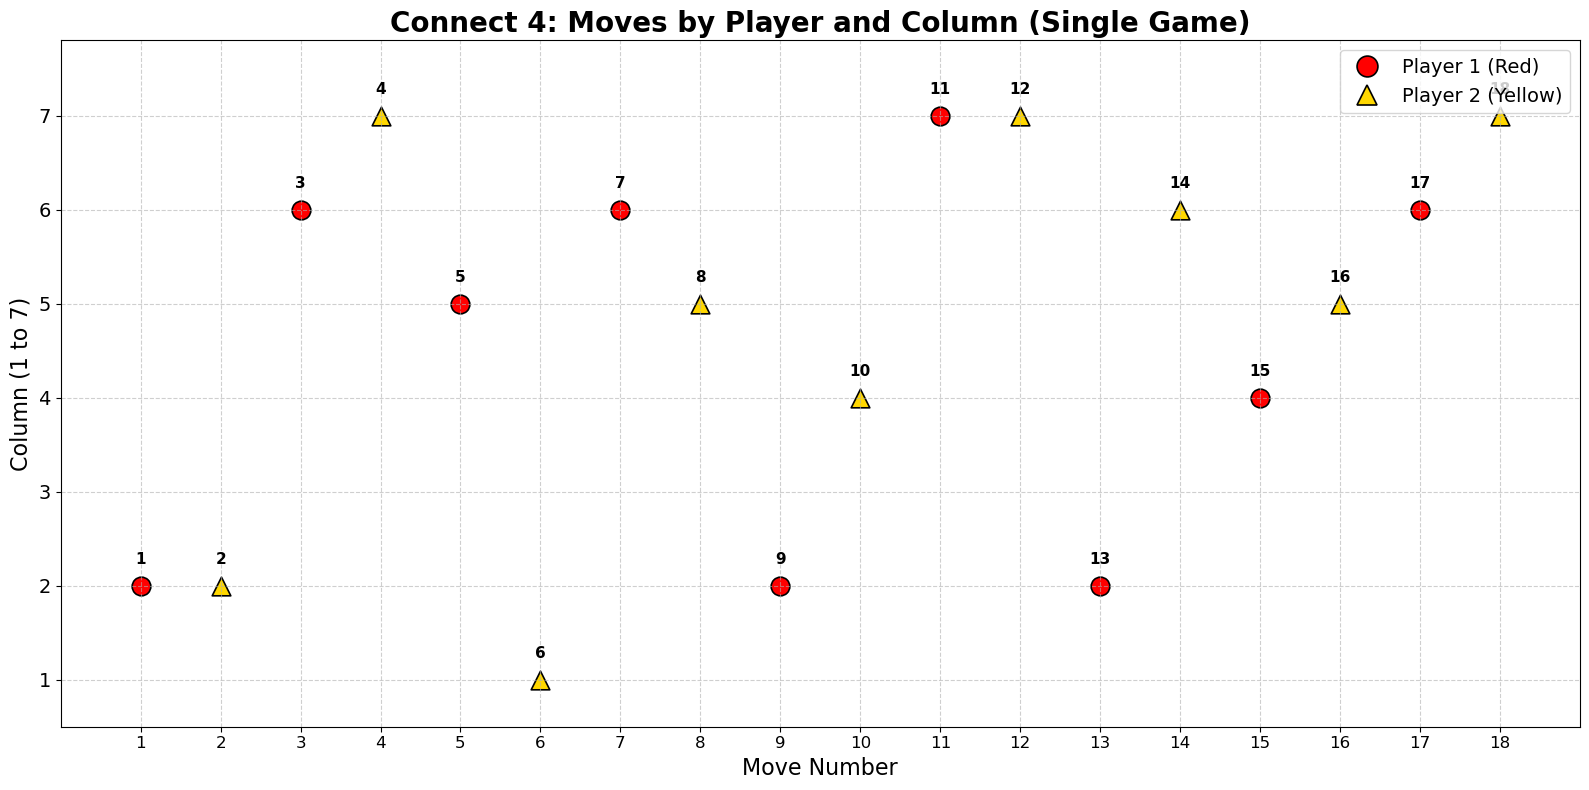


📊 After simulating 1000 games:
Probability that a game lasts more than 20 moves: 48.90%


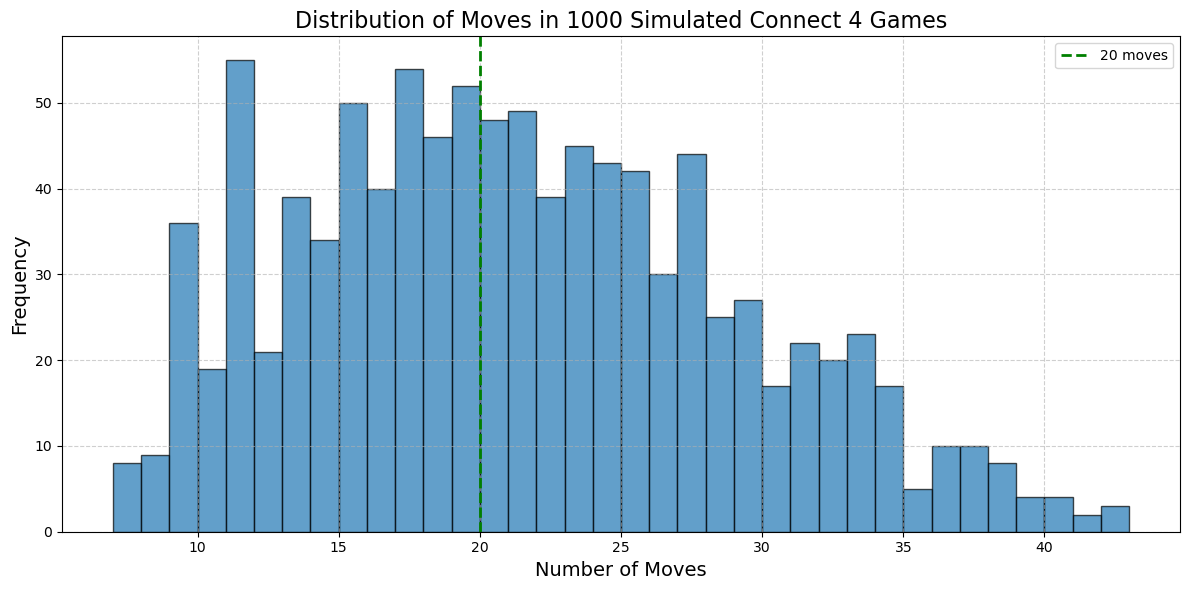

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Game settings
ROWS, COLS = 6, 7
MAX_MOVES = ROWS * COLS
players = [1, 2]

def is_valid_move(board, col):
    return board[0][col] == 0

def get_next_open_row(board, col):
    for r in range(ROWS - 1, -1, -1):
        if board[r][col] == 0:
            return r
    return None

def drop_piece(board, row, col, piece):
    board[row][col] = piece

def check_win(board, piece):
    for r in range(ROWS):
        for c in range(COLS - 3):
            if all(board[r, c + i] == piece for i in range(4)):
                return True
    for r in range(ROWS - 3):
        for c in range(COLS):
            if all(board[r + i, c] == piece for i in range(4)):
                return True
    for r in range(ROWS - 3):
        for c in range(COLS - 3):
            if all(board[r + i, c + i] == piece for i in range(4)):
                return True
    for r in range(3, ROWS):
        for c in range(COLS - 3):
            if all(board[r - i, c + i] == piece for i in range(4)):
                return True
    return False

# Simulate one game with move log
board = np.zeros((ROWS, COLS), dtype=int)
move_log = []
move_columns = []
move_players = []

game_over = False
turn = 0
move_count = 0

while not game_over and move_count < MAX_MOVES:
    player = players[turn % 2]
    valid_cols = [c for c in range(COLS) if is_valid_move(board, c)]
    if not valid_cols:
        break
    col = random.choice(valid_cols)
    row = get_next_open_row(board, col)
    drop_piece(board, row, col, player)
    move_count += 1
    move_log.append(f"Move {move_count}: Player {player} → Column {col + 1}")
    move_columns.append(col + 1)
    move_players.append(player)
    if check_win(board, player):
        game_over = True
        winner = player
        break
    turn += 1

# Game result
print("📝 Game Log:")
for move in move_log:
    print(move)

if game_over:
    print(f"\n🎉 Player {winner} wins after {move_count} moves!")
else:
    print("\n🤝 It's a draw!")

print("\n📦 Final Board:")
for row in board:
    print("| " + " ".join(str(cell) if cell != 0 else "." for cell in row) + " |")

# Plot single game moves
plt.figure(figsize=(16, 8))
for i, (move_num, col, player) in enumerate(zip(range(1, move_count + 1), move_columns, move_players)):
    plt.scatter(move_num, col,
                color='red' if player == 1 else 'gold',
                marker='o' if player == 1 else '^',
                s=180, edgecolor='black', linewidth=1.2)
    plt.text(move_num, col + 0.2, str(move_num), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Connect 4: Moves by Player and Column (Single Game)', fontsize=20, fontweight='bold')
plt.xlabel('Move Number', fontsize=16)
plt.ylabel('Column (1 to 7)', fontsize=16)
plt.yticks(range(1, COLS + 1), fontsize=14)
plt.xticks(range(1, move_count + 1), fontsize=12)
plt.xlim(0, move_count + 1)
plt.ylim(0.5, COLS + 0.8)
plt.grid(True, linestyle='--', alpha=0.6)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Player 1 (Red)',
           markerfacecolor='red', markersize=15, markeredgecolor='black', markeredgewidth=1.2),
    Line2D([0], [0], marker='^', color='w', label='Player 2 (Yellow)',
           markerfacecolor='gold', markersize=15, markeredgecolor='black', markeredgewidth=1.2)
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=14)
plt.tight_layout()
plt.show()

# Simulate 100 games and measure if moves > 20
def simulate_game():
    board = np.zeros((ROWS, COLS), dtype=int)
    turn = 0
    move_count = 0
    game_over = False
    while not game_over and move_count < MAX_MOVES:
        player = players[turn % 2]
        valid_cols = [c for c in range(COLS) if is_valid_move(board, c)]
        if not valid_cols:
            break
        col = random.choice(valid_cols)
        row = get_next_open_row(board, col)
        drop_piece(board, row, col, player)
        move_count += 1
        if check_win(board, player):
            game_over = True
            break
        turn += 1
    return move_count

num_simulations = 1000
move_counts = [simulate_game() for _ in range(num_simulations)]

count_over_20 = sum(1 for moves in move_counts if moves > 20)
probability_over_20 = count_over_20 / num_simulations

print(f"\n📊 After simulating {num_simulations} games:")
print(f"Probability that a game lasts more than 20 moves: {probability_over_20:.2%}")

# Plot move count histogram
plt.figure(figsize=(12, 6))
plt.hist(move_counts, bins=range(min(move_counts), MAX_MOVES + 2), edgecolor='black', alpha=0.7)
plt.axvline(20, color='green', linestyle='--', linewidth=2, label='20 moves')
plt.title(f'Distribution of Moves in {num_simulations} Simulated Connect 4 Games', fontsize=16)
plt.xlabel('Number of Moves', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Type of observation: Empirical probability

You are running actual simulations and counting results.
The outcome is based on data, not math formulas.
This shows what happens in practice, not what should happen in theory.

One trial of the simulation:

A single game plays out from start to finish.
Players take turns dropping pieces.
The trial ends when a player wins or the board is full.

Outcome measured:

The total number of moves in the game.
You check if that number is greater than 50.

Why this setup:

The board holds 42 spaces.
Some games end early if someone wins fast.
Others go longer, especially close matches.
Repeating the game 100 times helps estimate how often long games happen.
This approach uses observed data to calculate probability.

Final answer: In my simulation of 1000 random Connect 4 games, about 48.9% lasted more than 20 moves. This means nearly half the games ended quickly (in 20 moves or less), while the rest extended beyond 20 moves before a player won or the board filled up. Your example game ended in 18 moves, showing how some games finish relatively fast. This result highlights the typical variability in game length when moves are chosen randomly, offering useful insight into the average duration of such games.